2022-04-05 <br/>
Digital Publications <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-04-05/readme.md

Word Cloud - Completed 

Special thanks to PrashantSaikia <br/>
https://github.com/PrashantSaikia/Wordcloud-in-Plotly

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-04-05/news_orgs.csv')
df.head()

,publication_name,parent_publication,url,owner,is_owner_founder,city,state,country,primary_language,primary_language_other,...,revenue_stream_other,revenue_stream_additional_info,revenue_stream_largest,revenue_streams_largest_other,paywall_or_gateway,paywall_or_gateway_other,advertising_products,advertising_product_other,real_world_impacts,summary
0,1808Delaware,Total|Local Media,https://1808delaware.com,Thomas Palmer,Yes,Mansfield,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1812Blockhouse,Total|Local Media,https://1812blockhouse.com,Thomas Palmer,Yes,Mansfield,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,You are looking at something new and innovativ...
2,365 Cincinatti,NaN,https://365cincinnati.com,NaN,No,Cincinatti,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This site and the Facebook page (100,000+ stro..."
3,40 South News,NaN,http://40southnews.com/contact,NaN,No,"Brentwood, Maplewood & Richmond Heights",MO,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40 South News covers Brentwood, Maplewood and ..."
4,6AM City Inc,NaN,https://6amcity.com,"Ryan Johnston, Ryan Heafy",Yes,Greenville,SC,United States,English,NaN,...,NaN,NaN,Direct sold advertising,NaN,I don't have a paywall,NaN,Branded content (e.g. marketing content with e...,NaN,6AM City was designed to drive local economic ...,6AM is redefining the future of local media as...


In [3]:
# Build out the word Cloud 

from wordcloud import WordCloud, STOPWORDS


def plotly_wordcloud(text):
    wc = WordCloud(stopwords = set(STOPWORDS),
                   max_words = 50,
                   max_font_size = 50)
    wc.generate(text)
    
    word_list=[]
    freq_list=[]
    fontsize_list=[]
    position_list=[]
    orientation_list=[]
    color_list=[]

    for (word, freq), fontsize, position, orientation, color in wc.layout_:
        word_list.append(word)
        freq_list.append(freq)
        fontsize_list.append(fontsize)
        position_list.append(position)
        orientation_list.append(orientation)
        color_list.append(color)
        
    # get the positions
    x=[]
    y=[]
    for i in position_list:
        x.append(i[0])
        y.append(i[1])
            
    # get the relative occurence frequencies
    new_freq_list = []
    for i in freq_list:
        new_freq_list.append(i*100)
    new_freq_list
    
    trace = go.Scatter(x=x, 
                       y=y, 
                       textfont = dict(size=new_freq_list,
                                       color=color_list),
                       hoverinfo='text',
                       hovertext=['{0}{1}'.format(w, f) for w, f in zip(word_list, freq_list)],
                       mode='text',  
                       text=word_list
                      )
    
    layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
    
    fig = go.Figure(data=[trace], layout=layout)
    
    return fig

In [4]:
def get_text (df,col):
    return df[col].str.cat(sep=' ')

In [5]:
print (df.columns)

Index(['publication_name', 'parent_publication', 'url', 'owner',
       'is_owner_founder', 'city', 'state', 'country', 'primary_language',
       'primary_language_other', 'tax_status_founded', 'tax_status_current',
       'year_founded', 'total_employees', 'budget_percent_editorial',
       'budget_percent_revenue_generation',
       'budget_percent_product_technology', 'budget_percent_administration',
       'products', 'products_other', 'distribution',
       'distribution_method_other', 'geographic_area',
       'core_editorial_strategy_characteristics',
       'core_editorial_strategy_characteristics_other', 'coverage_topics',
       'coverage_topics_other', 'underrepresented_communities',
       'underrepresented_communities_not_listed', 'revenue_streams',
       'revenue_stream_other', 'revenue_stream_additional_info',
       'revenue_stream_largest', 'revenue_streams_largest_other',
       'paywall_or_gateway', 'paywall_or_gateway_other',
       'advertising_products', 'advert

In [6]:
full_text = get_text (df, "real_world_impacts")
fig = plotly_wordcloud (full_text)

fig.update_layout(title = "How impactful are these Publications ")
fig.show()


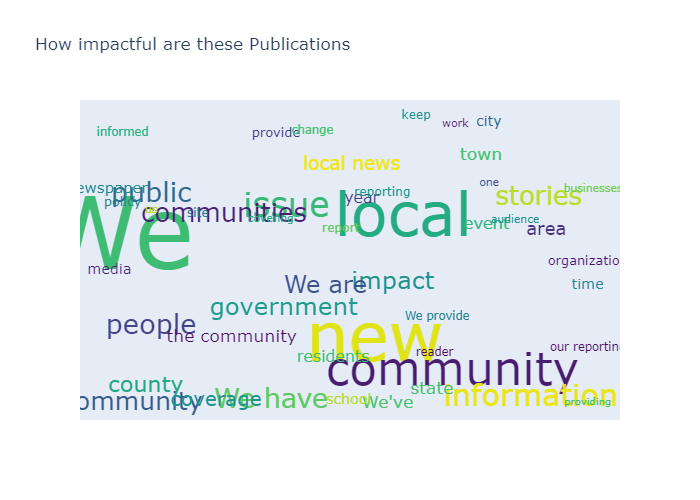

In [7]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [8]:
full_text = get_text (df, "distribution")
fig = plotly_wordcloud (full_text)

fig.update_layout(title = "Who do they reach out to")
fig.show()


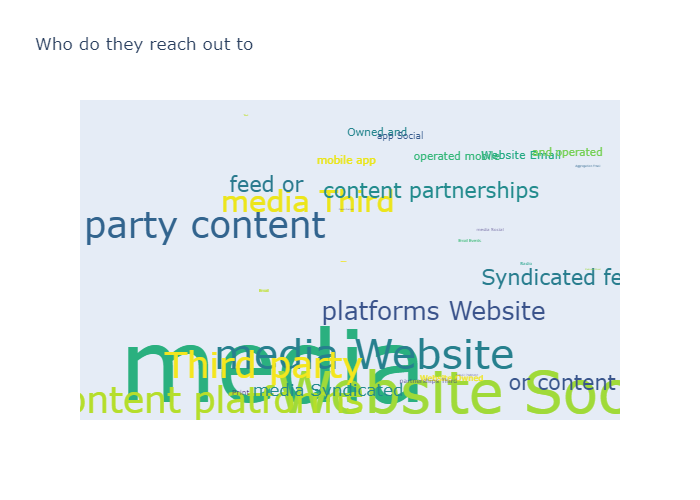

In [9]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [10]:
full_text = get_text (df, "revenue_streams")
fig = plotly_wordcloud (full_text)

fig.update_layout(title = "How do these publications earn")
fig.show()


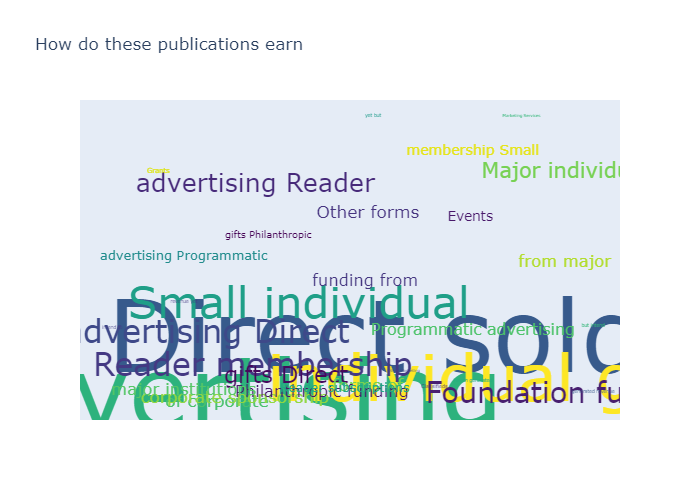

In [11]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)